In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler

In [0]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)

mean = np.mean(imagenes,axis=0)
std = imagenes.std(axis=0)
std[std==0]=1.0

for i in range(len(train)):
    imagenes[i] = (imagenes[i]-mean)/std


In [158]:
x_train = torch.autograd.Variable(torch.Tensor(imagenes).float())
x_train = x_train.unsqueeze(1)

X_new = x_train # necesario para que las dimensiones sean [batch, channel, width]
feature_maps = torch.autograd.Variable(torch.Tensor(X_new).float())

n =  torch.nn.Conv2d(1, 15, 2, stride=3)
feature_maps = n(feature_maps)

n =   torch.nn.Conv2d(15, 5, 2)
feature_maps = n(feature_maps)

print(feature_maps.size())

torch.Size([1797, 5, 2, 2])


In [0]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 20, kernel_size=2, stride=2),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(20,40,kernel_size=2),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(40,20,kernel_size=2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(20,1,kernel_size=2, stride=2),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
num_epochs = 200
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [206]:
loss_values = np.zeros(num_epochs)
for epoch in range(num_epochs):
    output = model(x_train)
    loss = distance(output, x_train)
    loss_values[epoch] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/200], loss:38.5649
epoch [2/200], loss:27.6331
epoch [3/200], loss:23.2622
epoch [4/200], loss:20.9834
epoch [5/200], loss:19.3408
epoch [6/200], loss:19.0061
epoch [7/200], loss:17.8452
epoch [8/200], loss:16.3153
epoch [9/200], loss:14.7990
epoch [10/200], loss:12.4666
epoch [11/200], loss:11.0095
epoch [12/200], loss:10.6924
epoch [13/200], loss:9.7688
epoch [14/200], loss:8.6534
epoch [15/200], loss:7.8413
epoch [16/200], loss:7.3668
epoch [17/200], loss:7.0251
epoch [18/200], loss:6.5335
epoch [19/200], loss:6.0954
epoch [20/200], loss:5.8936
epoch [21/200], loss:5.6460
epoch [22/200], loss:5.3066
epoch [23/200], loss:4.9924
epoch [24/200], loss:4.7117
epoch [25/200], loss:4.4519
epoch [26/200], loss:4.2273
epoch [27/200], loss:4.0123
epoch [28/200], loss:3.7763
epoch [29/200], loss:3.5622
epoch [30/200], loss:3.4123
epoch [31/200], loss:3.2689
epoch [32/200], loss:3.0765
epoch [33/200], loss:2.8598
epoch [34/200], loss:2.6441
epoch [35/200], loss:2.4555
epoch [36/200], l

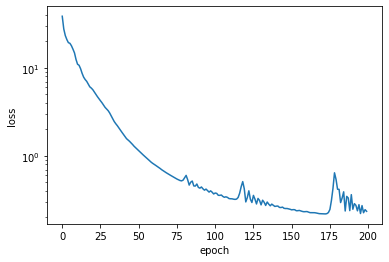

In [213]:
plt.plot(np.arange(num_epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.yscale('log')

In [0]:
x_transform = model(x_train)
latent_space = model.encoder(x_train)

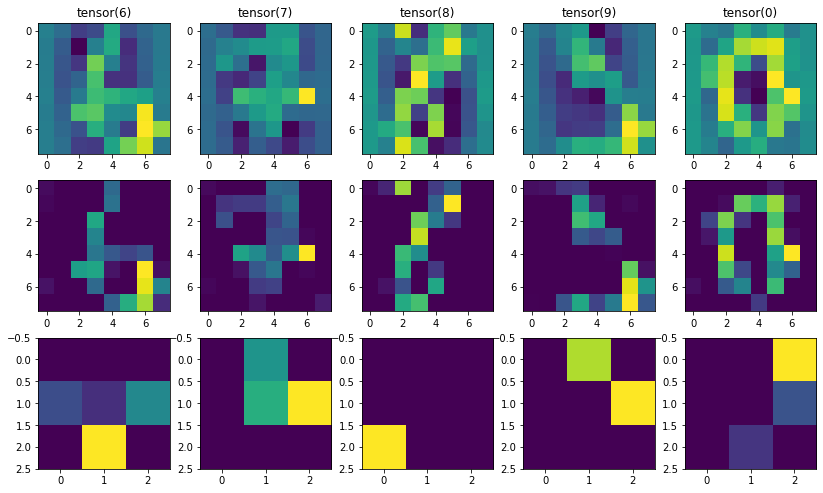

In [209]:
plt.figure(figsize=(14,14))
offset = 16
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(x_train[i+offset][0].detach().numpy())
    plt.title(target[i+offset])
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())